# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, **Team CBB6**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Tweet Challenge 

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
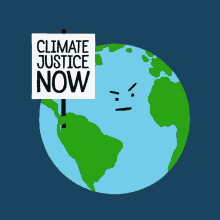

![twitter-bird-animated-logo.gif?w=300&zoom=2](https://www.icegif.com/wp-content/uploads/2022/04/icegif-1013.gif)

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Pre-Processing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modelling</a>

<a href=#seven>7. Model Performance</a>

<a href=#seven>8. Model Selection</a>

<a href=#seven>9. Conclusion</a>

<a href=#seven>10. Test Data and Model Submission</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

### 1.1. Importing Comet and Loading Experiment 

In [ ]:
# from comet_ml import Experiment

In [ ]:
# Setting the API key (saved as environment variable)
#experiment = Experiment(api_key='sSW0zwO26JyUszNcAsm3Zq8cE',
#                        project_name="classification-predict", workspace="wadejacobs") 

### 1.2. Importing Main and Ancillary Packages  

In [ ]:
# Importing modules for data science and visualization
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline
pd.set_option('max_columns', 200)

# Imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
import fasttext
import spacy.cli
import html 
from langdetect import detect
import contractions
import unicodedata
import xgboost
import scipy.sparse
from sklearn import metrics
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tag import pos_tag
from nlppreprocess import NLP
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import library for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

# Import library for train test split
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import resample

# Hyperparameter tuning methods
import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, ParameterGrid

# Import libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wadejacobs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wadejacobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Load data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

In [ ]:
# Explore and evaluate data set
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
# Shape of training data set
print("Shape of the training data set:", train.shape)
print("Shape of the test data set:", test.shape)


Shape of the training data set: (15819, 3)
Shape of the test data set: (10546, 2)


In [ ]:
# Composition of the "Sentiment" feature in our training data set
train['sentiment'].unique()

array([ 1,  2,  0, -1])

In summation, the training data set is comprised of 3 (Three) columns, mainly a "sentiment", "message" and "tweetid" column, whereas the testing data set is compromised of 2 (Two) columns, specifically a "message" and "tweetid" column.  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this section, we shall explore and analyse our data set in order to fully understand all of the information that we have before us. 

In [ ]:
# Copy of the training and test data sets
train_df = train.copy()
test_df = test.copy()
data_bd = train.copy()

In [ ]:
# Assessing the data type of the training data 
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [ ]:
# Composition of the "sentiment" feature in our training data set
train_df['sentiment'].unique()

array([ 1,  2,  0, -1])

Text(0.5, 1.0, 'Sentiment Distribution')

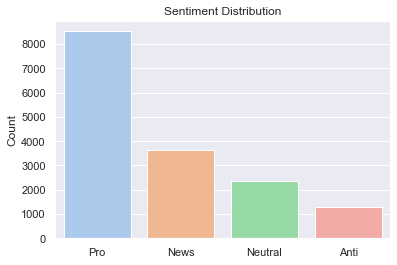

In [ ]:
# Calculating the number of tweets per Sentiment and plot the distribution thereof.
class_distribution = pd.DataFrame(list(train_df['sentiment'].value_counts()), index=['Pro', 'News', 'Neutral', 'Anti'], columns=['Count'])
sns.set()
sns.barplot(x=class_distribution.index, y=class_distribution.Count, palette="pastel")
plt.title('Sentiment Distribution')

As displayed hereinabove, there are more than 8000 "Pro" tweets, and on or about 3500 "News" tweets. The "Anti" tweets account for less than 20% of the "Pro" tweets in totality.

Text(0.5, 1.0, 'Sentiment Distribution')

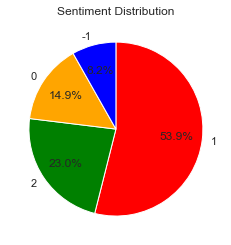

In [ ]:
# Pie chart representation.
dist_class = train_df['sentiment'].value_counts()
labels = ['1', '2','0','-1']
colors = ['red', 'green', 'orange', 'blue']
plt.pie(dist_class,
        labels=labels,
        colors = colors,
        counterclock=False,
        startangle=90,
        autopct='%1.1f%%',
        pctdistance=0.7)
plt.title("Sentiment Distribution")

As can be seen above, the sum of the tweets relating to the abovementioned classes, mainly news, neutral and anti is less than half of the total tweets. Furthermore, there is a notable imbalance in the data set as a result of the disproportionate ratio of observations in each class. As such, we will directly address this class imbalance hereinbelow. 

/Users/wadejacobs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wadejacobs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wadejacobs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0, 0.5, 'Density')

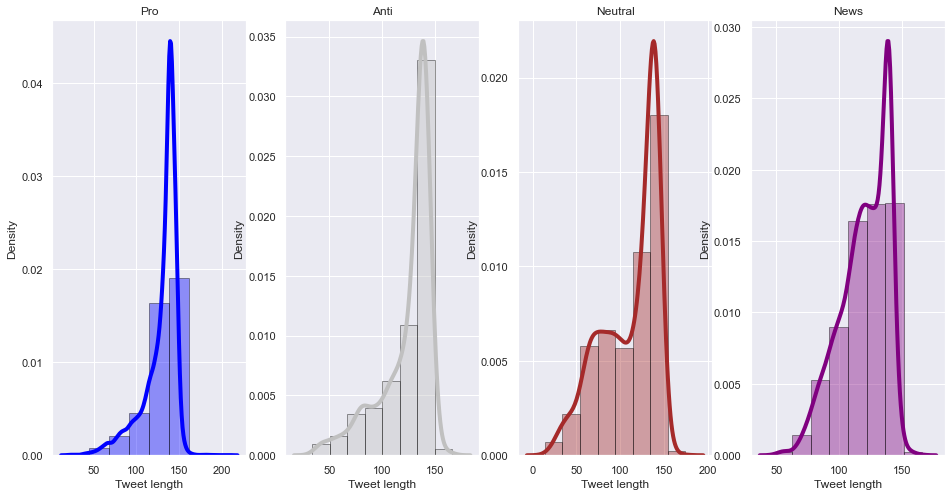

In [ ]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

# Pro 
sns.distplot(train_df[train_df['sentiment']==1]['message'].str.len(), hist=True, kde=True, bins=int(200/25), color = 'blue', ax = ax1, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax1.set_title('Pro')
ax1.set_xlabel('Tweet length')
ax1.set_ylabel('Density')

# Anti 
sns.distplot(train_df[train_df['sentiment']==-1]['message'].str.len(), hist=True, kde=True, bins=int(200/25), color = 'silver', ax = ax2, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax2.set_title('Anti')
ax2.set_xlabel('Tweet length')
ax2.set_ylabel('Density')

# Neutral 
sns.distplot(train_df[train_df['sentiment']==0]['message'].str.len(), hist=True, kde=True, bins=int(200/25), color = 'brown', ax = ax3, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax3.set_title('Neutral')
ax3.set_xlabel('Tweet length')
ax3.set_ylabel('Density')

# News
sns.distplot(train_df[train_df['sentiment']==2]['message'].str.len(), hist=True, kde=True, bins=int(200/25), color = 'purple', ax = ax4, hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('Tweet length')
ax4.set_ylabel('Density')

In the next section, we are going to visualize the the most prolific words and/or phrases in our data set by way of various visual aids, including but not limited to, graphs and WordClouds.  

In [ ]:
# Identifying the row that we want 
tweet = train_df['message']

# Creating a new DataFrame
tweet_df = pd.DataFrame(tweet)

# Add sentiment column to the tweets dataframe
tweet_df['sentiment'] = train_df['sentiment']
news_tweets = ' '.join([text for text in tweet_df['message'][tweet_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweet_df['message'][tweet_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweet_df['message'][tweet_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweet_df['message'][tweet_df['sentiment'] == -1]])

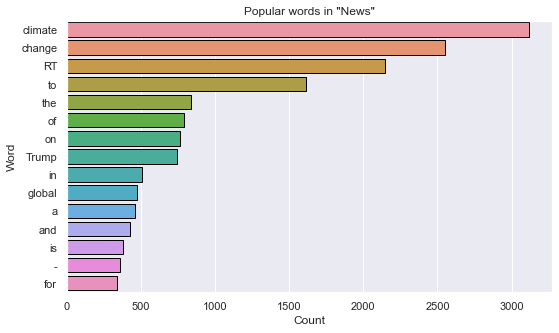

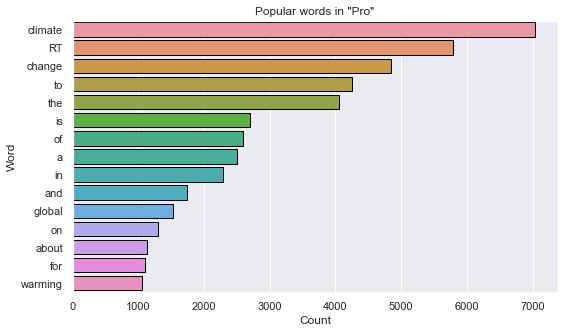

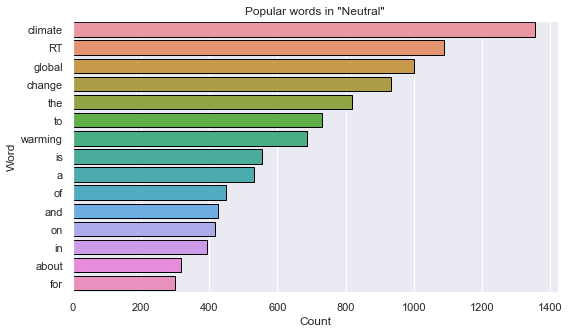

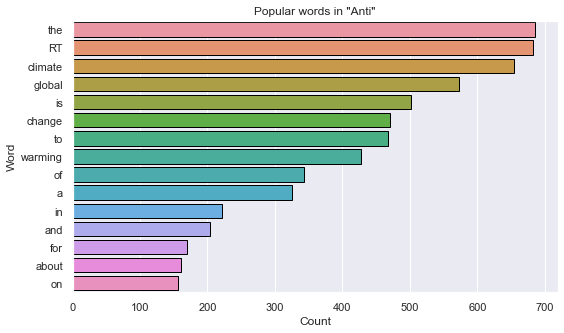

In [ ]:
# Visualising sentiment classes  
full_title = ['Popular words in "News"','Popular words in "Pro"','Popular words in "Neutral"','Popular words in "Anti"']

# Creating a list for the visuals 
tweet_list = [news_tweets, pro_tweets, neutral_tweets, anti_tweets]
plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),'Count' : list(freq_dist.values())})
    df = df.nlargest(columns='Count', n=15)
    ax = sns.barplot(data=df, y='Word', x='Count', edgecolor='black')
    plt.title(full_title[i])
    plt.show()

A word cloud will help to visualize our keywords and any other text data. This highlights trending terms based on frequency of use and prominence. As such, the larger the word in the belowmentioned visual, the more common the word is in the message feature.

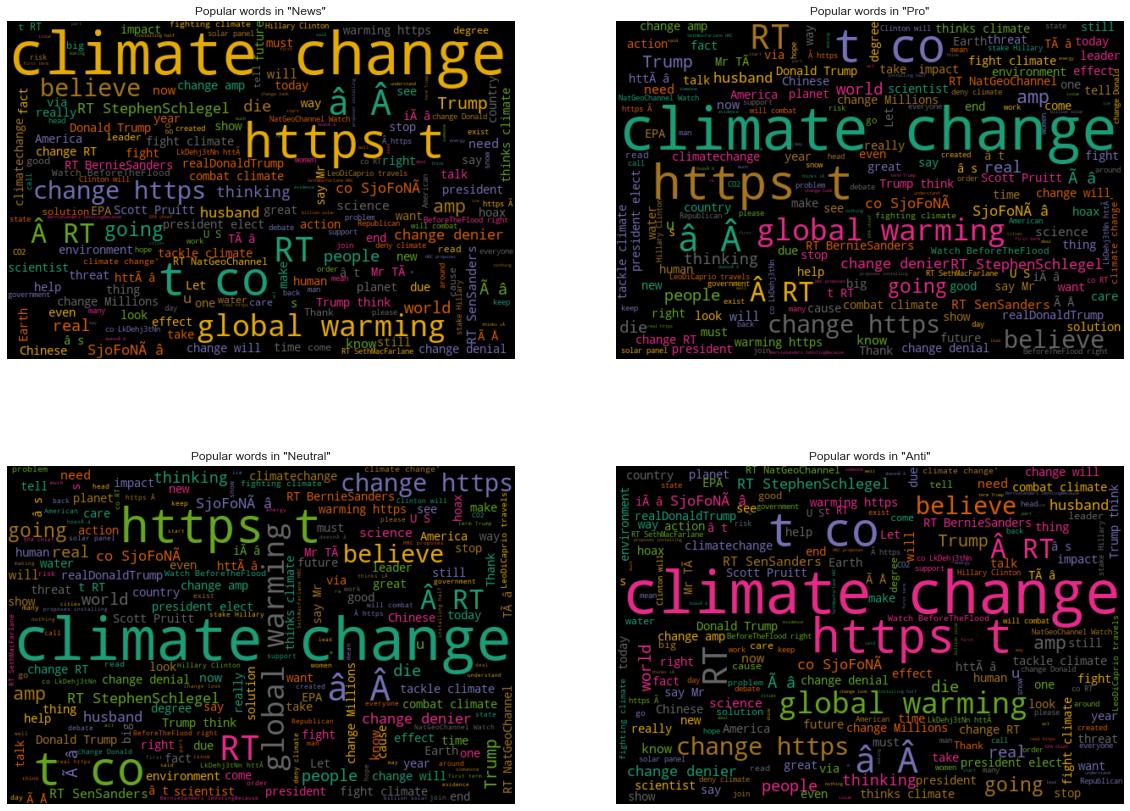

In [ ]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
plt.show()

Lastly, we will analyse the relation between the tagged users and our target variable. As it appears hereinbelow, there appears to be a strong correlation between certain sentiments and specific users and/or their tags.    

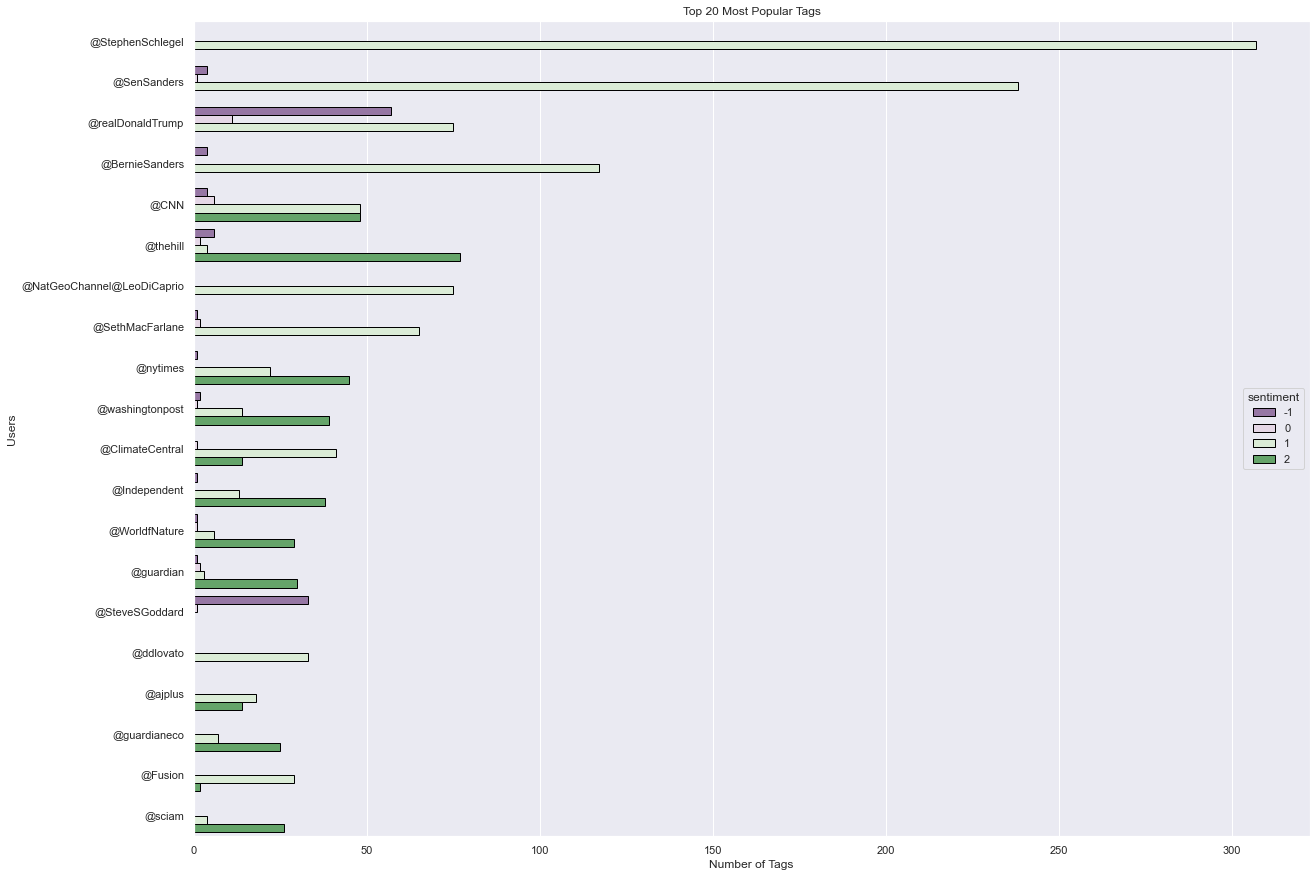

In [ ]:
# Extracting the tagged users
train_df['users'] = [''.join(re.findall(r'@\w{,}', line)) if '@' in line else np.nan for line in train_df.message]

# Analysis of most popular tags, sorted by populariy
sns.countplot(y = "users", hue = "sentiment", data = train_df, palette = 'PRGn', edgecolor='black', order=train_df.users.value_counts().iloc[:20].index) 

plt.rcParams['figure.figsize']=(100,100)
plt.ylabel('Users')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()


Insights derived from Exploratory Data Analysis:

- The tweets contain various punctuation marks, including numeric values and web URLs;  

- The tweets are also in a mixed case format;

- The most prolific words in the WordClouds contain the words "climate change", "global warming", "believe climate", "Trump";

- The sentiment class is strictly comprised of unique numerical values, ranging from -1 to 2; 

- There are an uneven distribution of observations amongst the various classes; 

- The sentiments and tweetid's column are of a numeric data type, while the messages column is a non-numeric data type; and

- Most of the mentions and/or tags are directed at prominent political figures, news outlets and various outspoken celebrities. 

<a id="four"></a>
## 4. Data Pre-Processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we are going to analyse our data sets further, and thereafter, apply various normalisation techniques in order to reduce data redundancy. 

This will also assist us in improving the quality and integrity of our data, as it entails organising the attributes of the data set to as to ensure that dependancies are properly enforced. Lastly, we will be utilising the technique of Lemmatization in order to prepare our words and texts for further processing. In Lemmatisation, the part of speech of a word/test will be first determined and the normalisation rules will be different for different parts of speech. 

It should be highlighted that real world data usually contains irrelevant information, which is usually coined as "noise". This noise significantly distorts our data analysis and modeling/predictive capabilities. It is essential to remove this noise and only retain the most vital and critical information. 

In [ ]:
# We need to merge our train and test data set
combine_df = train_df.append(test_df, ignore_index = True, sort = False)
originalcombined = combine_df.copy()

In [ ]:
# Combined data set information
print(combine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
 3   users      11818 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 824.0+ KB
None


### 4.1. Removing Contractions

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardization and is useful when we are working on Twitter data for sentiment analysis.

In [ ]:
# Remove contractions on combined data set
combine_df['message'] = combine_df['message'].apply(lambda x: [contractions.fix(word) for word in x.split()])
combine_df['message'] = [' '.join(map(str, l)) for l in combine_df['message']]

In [ ]:
combine_df.head()

,sentiment,message,tweetid,users
0,1.0,PolySciMajor EPA chief does not think carbon d...,625221,@mashable
1,1.0,It is not like we lack evidence of anthropogen...,126103,NaN
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,@RawStory
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,NaN
4,1.0,"RT @SoyNovioDeTodas: It is 2016, and a racist,...",466954,@SoyNovioDeTodas


### 4.2. Removing non-English words

In [114]:
# Language detection
def detect_language(tweet):
    return detect(tweet)
combine_df['language'] = combine_df['message'].apply(detect_language)

In [115]:
# Creating a new dataframe that will show the language type 
lang = combine_df['language'].value_counts()
lang_df = pd.DataFrame({'ISO Code':lang.index, 'Rows':lang.values})
lang_df.set_index('ISO Code', inplace=True)
lang_df.head(10) 

,Rows
ISO Code,
en,26083
it,41
tl,39
id,37
fr,30
af,26
nl,25
de,16
so,11


### 4.3. Cleaning Tweets

The code below will remove the noise from the DataFrame which includes removing the URLs, numbers, punctuations, emojis/characters, acsii's and white spaces. 

In [116]:
def Cleantweet(tweet):

    # Removes RT, URLs and white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', tweet).strip()) 
    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    line = emojis.sub(r'', line)

    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    tweet = punctuation.sub("", line.lower()) 

    # Removes numbers 
    tweet = re.sub(r'\d+','', tweet)

    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    tweet = nlp_for_stopwords.process(tweet) 

    return tweet 

In [117]:
# Converting our dataframe in line with the above function 
combine_df['message'] = combine_df['message'].apply(Cleantweet)
combine_df.head(10)

,sentiment,message,tweetid,users,language
0,1.0,polyscimajor epa chief not think carbon dioxid...,625221,@mashable,en
1,1.0,not like we lack evidence anthropogenic global...,126103,NaN,en
2,2.0,@rawstory researchers say we three years act c...,698562,@RawStory,en
3,1.0,#todayinmaker# wired pivotal year in war clima...,573736,NaN,en
4,1.0,@soynoviodetodas and racist sexist climate cha...,466954,@SoyNovioDeTodas,en
5,1.0,worth read whether you not believe in climate ...,425577,NaN,en
6,1.0,@thenation mike pence not believe in global wa...,294933,@thenation,en
7,1.0,@makeandmendlife six big things we can today f...,992717,@makeandmendlife,en
8,1.0,@aceofspadeshq my yo nephew inconsolable wants...,664510,@AceofSpadesHQ,en
9,1.0,@paigetweedy no offense… but like… how you jus...,260471,@paigetweedy,en


### 4.4. POS Tagging and Lemmatization 

In [119]:
def lemmatization(tweet):
    tweet = tweet.split() 
    pos = pos_tag(tweet) # POS
    lemmatizer = WordNetLemmatizer() # Lemmatization
    tweet = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])
    return tweet

In [121]:
# POS Tagging and Lemmatization
combine_df['lemmatization'] = combine_df['message'].apply(lemmatization)

In [122]:
# Escaping reserved characters from HTML markup
combine_df['messages'] = combine_df['lemmatization'].apply(lambda x: html.unescape(x))
#combine_df['messages'] = combine_df['messages'].apply(lambda val: unicodedata.normalize('NFKD', val).encode('ascii', 'ignore').decode())

In [123]:
# Creating a column for the hashtags
combine_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) if '#' in line else np.nan for line in combine_df.messages]
combine_df.head(10)

,sentiment,message,tweetid,users,language,lemmatization,messages,hashtags
0,1.0,polyscimajor epa chief not think carbon dioxid...,625221,@mashable,en,polyscimajor epa chief not think carbon dioxid...,polyscimajor epa chief not think carbon dioxid...,NaN
1,1.0,not like we lack evidence anthropogenic global...,126103,NaN,en,not like we lack evidence anthropogenic global...,not like we lack evidence anthropogenic global...,NaN
2,2.0,@rawstory researchers say we three years act c...,698562,@RawStory,en,@rawstory researcher say we three year act cli...,@rawstory researcher say we three year act cli...,NaN
3,1.0,#todayinmaker# wired pivotal year in war clima...,573736,NaN,en,#todayinmaker# wire pivotal year in war climat...,#todayinmaker# wire pivotal year in war climat...,#todayinmaker #
4,1.0,@soynoviodetodas and racist sexist climate cha...,466954,@SoyNovioDeTodas,en,@soynoviodetodas and racist sexist climate cha...,@soynoviodetodas and racist sexist climate cha...,#electionnight
5,1.0,worth read whether you not believe in climate ...,425577,NaN,en,worth read whether you not believe in climate ...,worth read whether you not believe in climate ...,NaN
6,1.0,@thenation mike pence not believe in global wa...,294933,@thenation,en,@thenation mike penny not believe in global wa...,@thenation mike penny not believe in global wa...,NaN
7,1.0,@makeandmendlife six big things we can today f...,992717,@makeandmendlife,en,@makeandmendlife six big thing we can today fi...,@makeandmendlife six big thing we can today fi...,NaN
8,1.0,@aceofspadeshq my yo nephew inconsolable wants...,664510,@AceofSpadesHQ,en,@aceofspadeshq my yo nephew inconsolable want ...,@aceofspadeshq my yo nephew inconsolable want ...,NaN
9,1.0,@paigetweedy no offense… but like… how you jus...,260471,@paigetweedy,en,@paigetweedy no offense… but like… how you jus...,@paigetweedy no offense… but like… how you jus...,NaN


Next, we will conduct a side-by-side comparative analysis on our previous data set and our amended data set.

In [137]:
print('Previous:')
print(originalcombined.loc[10, 'message'])
print('Current:')
print(combine_df.loc[10, 'messages'])

Previous:
RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
Current:
@stephenschlegel think about how go die because your husband not believe in climate change ¢â‚¬â¦


### 4.5. Frequency of Words 

Word clouds are commonly used for the visualization of pertinent information. As displayed hereinbelow, the varying sizes of text data will display the relative frequency of the usage of a specific word. The bigger and bolder the word, the more often it is selected by the particular user. Word Clouds are a powerful way to visualise the most important sentiments held by a specific demographic. As an example, we expect the phases, "climate change", to appear quite frequently in our data set, and as such, it will be rather large in our data set.    

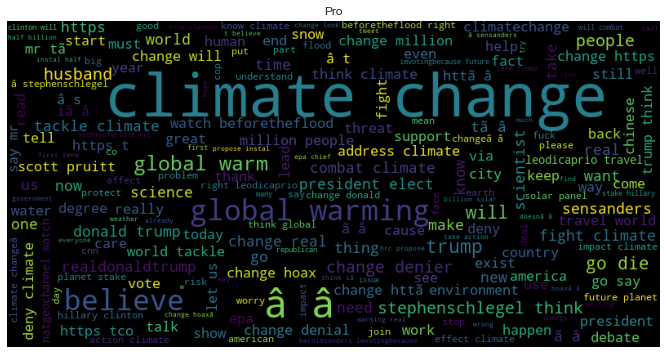

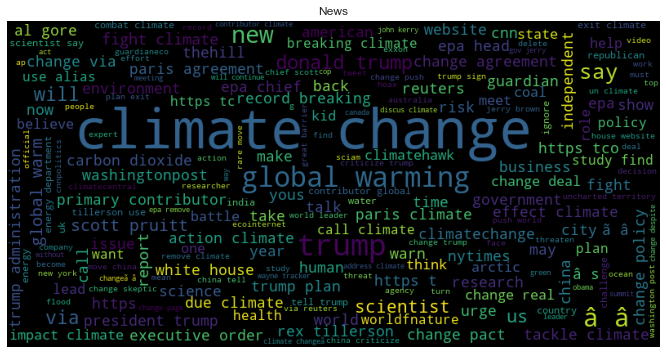

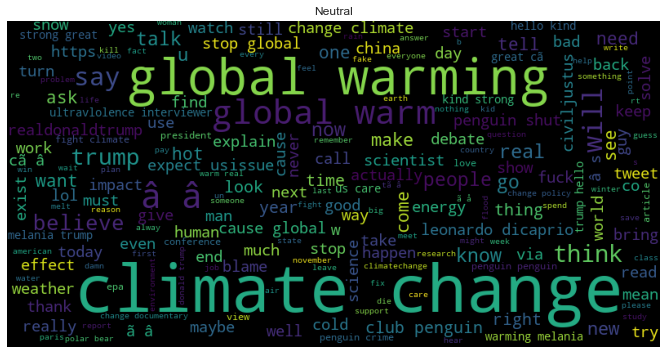

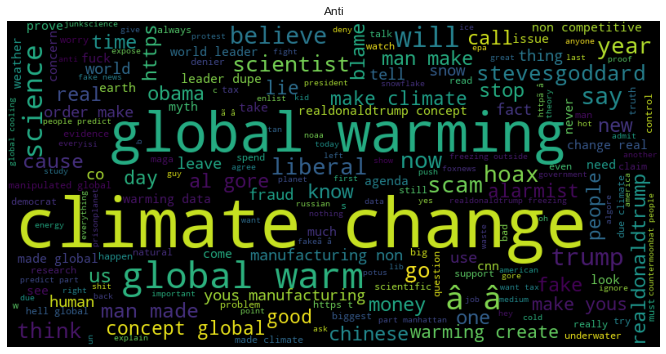

In [138]:
# Plot wordcloud for Pro Class
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(combine_df[combine_df['sentiment'] == 1]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Pro')
plt.show()

# Plot for News class
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(combine_df[combine_df['sentiment'] == 2]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('News')
plt.show()

# Plot for Neutral class 
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(combine_df[combine_df['sentiment'] == 0]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Neutral')
plt.show()

#Plot for Anti class 
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(' '.join(combine_df[combine_df['sentiment'] == -1]
                                          ['messages']))
plt.figure( figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Anti')
plt.show()

#### 4.5.1. "Pro" Class Analysis

Notwithstanding the words "climate change" and "global warming", it appears that the words "believe" and "change denier" are commonly recurring in this class. Despite oftenly being associated with negative sentiments towards climate change, former President Donald Trump is mentioned quite a bit in the Pro sentiment class.       

#### 4.5.2. "News" Class Analysis

This class covers a wider breadth of topics which are directly and indirectly related to the issue of climate change. These tweets are mainly composed of messages from a variety of media houses, and as such, for the most part, they are extremely factual in nature. As the Head of State, it is to no surprise that former President Donal Trump was mentioned quite a bit in the news, especially during the period from 2015 to 2018. 

#### 4.5.3. "Neutral" Class Analysis

This class contains a varied assortment of words and/or phrases. As described herein, these tweets neither support not refute the belief of man-made climate change. 

#### 4.5.4. "Anti" Class Analysis

This class will ordinarily contain the most negative sentiments towards climate change, including but not limited to, "hoax", "alarmist" and "scam" amongst other things. The usage of such words and/or phrases would commonly be associated with an individual who would generally have an adverse belief of climate change. 

<a id="four"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.1. Feature Engineering 

In this section, we will look further into feature extraction from text using vectorization, more specifically, CountVectorizer (CV) and TfidfVectorizer (TF-IDF). These are tools assist with encoding words as integers or floating point values for use as input to a machine learning model. In essense, it can be used to clean text data and extract features, transform the text data into a matrix of numbers that can be fed into a machine learning model.

A CV is a way to convert a given set of strings into a frequency representation, while a TF-IDF, meaning a Term Frequency-Inverse Document Frequency, is a statistic that is based on the frequency of a word in the corpus. It should be noted that it also provides a numerical representation of how important a word is for statistical analysis.    

#### 5.1.1. CountVectorizer 

In [139]:
# Splitting the data into train & test
train_split = combine_df[:15819]
test_dummy = combine_df[15819:]
test_split = combine_df[15819:].drop(['sentiment'], axis=1)

In [140]:
# Preparing the Vectorizer
train_split_messages_1 = train_split['messages']
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
count_vectorized = vectorizer.fit_transform(train_split_messages_1)

#### 5.1.2. TF-IDF 

In [141]:
# Converting the collection of clean messages to a matrix of TF-IDF features
train_split_messages_2 = train_split['messages']
tfidvec = TfidfVectorizer(use_idf=True, max_df=0.95) 
vectorized = tfidvec.fit_transform(train_split_messages_1)

In some instances, the CountVectorizer is better suited for model training and in other instances, the TF-IDF is better. As you can see above, we have decided to implement them both. Although the two representations are very similar and therefore carry approximately the same information, it could be the case that you will get better precision by using the full set of features.

<a id="five"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1. Imbalanced Data

#### 6.1.1. Train-Test Split 

In [142]:
# Defining the features as well as the labels
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = train_split['sentiment'] 

In [143]:
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

#### 6.1.2. Model Training

In [144]:
# The models 
names = ['Logistic Regression'
         ,'Nearest Neighbors'
         ,'Linear SVC'
         ,'RBF SVC'
         ,'Linear SVM'
         ,'Decision Tree'
         ,'Random Forest'
         ,'AdaBoost'
]

In [145]:
# The metrics  
classifiers = [
    LogisticRegression()
    , KNeighborsClassifier(3)
    , SVC(kernel = "linear", random_state = 5)
    , SVC(kernel = 'rbf', random_state = 5)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth = 5)
    , RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1)
    , AdaBoostClassifier()
]

In [146]:
# Training of our models, scoring & appending to the results list
results = []

# Creation of dictionaries 
models = {}
confusion = {}
class_report = {}

# Column for the training time for each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# Status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# Status of the scoring
    print ('... scoring')
    
# The evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')
    f1        = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='macro')

# Saving the results to our dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creation of a dataframe 
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring


In [147]:
# Initializing our newly created dataframe
print("The results of our modeling, are as follows:")
results.sort_values('F1 Test', ascending=False)

The results of our modeling, are as follows:


,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.998578,0.998648,0.998114,0.998381,0.650755,3.731615
Linear SVM,0.999210,0.999230,0.999013,0.999121,0.646813,1.992868
Linear SVC,0.998894,0.999034,0.998561,0.998797,0.640571,39.725116
RBF SVC,0.934808,0.954163,0.881418,0.912317,0.550504,38.937967
AdaBoost,0.610905,0.590846,0.431761,0.457132,0.442658,45.114253
Nearest Neighbors,0.607112,0.683420,0.633424,0.590426,0.371895,0.001258
Decision Tree,0.574951,0.758560,0.310811,0.290716,0.292839,1.047065
Random Forest,0.538285,0.134571,0.250000,0.174963,0.175952,0.026117


<AxesSubplot:xlabel='Classifier'>

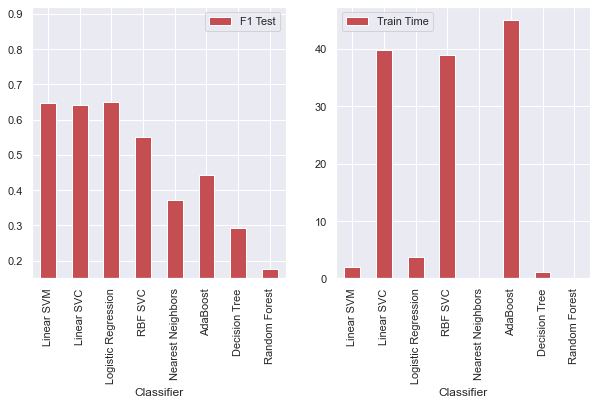

In [148]:
# Visualization of our results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92], color='r')
results.plot(y='Train Time', kind='bar', ax=ax[1], color='r')

#### 6.1.3. Hyperparameter Tuning

As evidenced above, and out of all the models trained and tested, the Logistic Regression Model, the Support Vector Machine and the Linear Support Vector Classifier faired substantially better than the other models. The F1 score for the three models were above 0.65, and as such, we shall proceed to optimize the performance of these aforementioned models on our imbalanced data set.  

In [149]:
# Independent feature 
X = train_split['messages']

# Dependent feature 
y = train_split['sentiment'] 

# Feature for testing purposes
X_testing = test_split['messages'] 

In [150]:
# Train and test split
X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
# Preparing our data 
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None, max_features = 180000, min_df = 1, ngram_range = (1,2))
vectorizer.fit(X_train_ht)
X_train_ht = vectorizer.transform(X_train_ht)
X_test_ht = vectorizer.transform(X_test_ht)
X_testing = vectorizer.transform(X_testing) 


#### i) Linear Support Vector Classifier 

In [152]:
# Tuning the Linear SVC 
# grid = {'C': np.logspace(-4, 4, 50)}
# parameters = ParameterGrid(grid)
# bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, parameters, X_train_ht, y_train_ht, X_test_ht, y_test_ht, 
#           metric = accuracy_score, scoreLabel = "AUC")
# print(bestModel, '\n',bestScore)

In [153]:
# Re-training our Linear SVC with the best parameters
lsvc_ht = LinearSVC(C=0.18420699693267145, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0) 
lsvc_ht.fit(X_train_ht, y_train_ht)
lsvc_prediction_ht = lsvc_ht.predict(X_test_ht)
final_lsvc_ht = accuracy_score(y_test_ht, lsvc_prediction_ht)
print(f'\nAccuracy score: {final_lsvc_ht}')


Accuracy score: 0.7604298356510746


In [154]:
print('Classification Report for the Linear SVC Model')
print(classification_report(y_test_ht, lsvc_prediction_ht))

Classification Report for the Linear SVC Model
              precision    recall  f1-score   support

        -1.0       0.78      0.47      0.59       278
         0.0       0.59      0.47      0.52       425
         1.0       0.79      0.87      0.83      1755
         2.0       0.76      0.77      0.77       706

    accuracy                           0.76      3164
   macro avg       0.73      0.65      0.68      3164
weighted avg       0.75      0.76      0.75      3164



#### ii) Logistic Regression Model  

In [155]:
# Tuning the Logistic Regression Model 
# grid_lr = [{'penalty':['l2'], 'C':np.logspace(-4, 4, 50), 'solver':['lbfgs']},]
# parameters_lr = ParameterGrid(grid_lr)
#bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, parameters_lr,
#           X_train_ht, y_train_ht, X_test_ht, y_test_ht, 
#           metric = accuracy_score, scoreLabel = "AUC")
# print(bestModel, '\n\n',bestScore)

In [156]:
# Re-training the Logistic Regresion Model with the best parameters                     
logr_ht = LogisticRegression(C = 7.9060432109076855, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logr_ht.fit(X_train_ht, y_train_ht)
logr_prediction_ht = logr_ht.predict(X_test_ht)
tuned_logreg_acc = round(accuracy_score(y_test_ht, logr_prediction_ht), 4)
print(f'Accuracy score: {tuned_logreg_acc}')

Accuracy score: 0.7639


In [157]:
print('Classification Report for the Logistic Regression Model')
print(classification_report(y_test_ht, logr_prediction_ht))

Classification Report for the Logistic Regression Model
              precision    recall  f1-score   support

        -1.0       0.75      0.47      0.58       278
         0.0       0.59      0.49      0.53       425
         1.0       0.79      0.87      0.83      1755
         2.0       0.78      0.77      0.78       706

    accuracy                           0.76      3164
   macro avg       0.73      0.65      0.68      3164
weighted avg       0.76      0.76      0.76      3164



#### iii) Support Vector Classifier   

In [158]:
# Tuning the Support Vector Classifier
# param_grid_svc = {'C': [0.1,1, 10], 'gamma': [0.1,0.01,0.001]}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train_ht,y_train_ht)
# print(grid.best_estimator_)

In [159]:
# Re-training the Support Vector Classifier with the best parameters
svc_ht = SVC(C = 10, gamma = 0.01, kernel = 'rbf', random_state = 42)
svc_ht.fit(X_train_ht, y_train_ht)
svc_prediction_ht = svc_ht.predict(X_test_ht)
tuned_svc_acc = round(accuracy_score(y_test_ht, svc_prediction_ht), 4)
print(f'Accuracy score: {tuned_svc_acc}')

Accuracy score: 0.738


In [160]:
print('Classification Report for the Support Vector Classifier')
print(classification_report(y_test_ht, svc_prediction_ht))

Classification Report for the Support Vector Classifier
              precision    recall  f1-score   support

        -1.0       0.81      0.42      0.56       278
         0.0       0.52      0.48      0.50       425
         1.0       0.81      0.81      0.81      1755
         2.0       0.69      0.83      0.75       706

    accuracy                           0.74      3164
   macro avg       0.70      0.64      0.65      3164
weighted avg       0.74      0.74      0.73      3164



Out of the 3 (Three) models described above, the Logistic Regression Model performed the best, followed closely by the Linear SVC Model, and lastly, the Support Vector Classifier. 

### 6.2. Balanced Data

#### 6.2.1 Upscaling and Downscaling our Class Sizes

In this section, we are going to alter the frequency of the observations in our data set. Once same has been altered, we are going to analyse whether it has resulted in an increase and/or decrease in our model performances.    

In [161]:
# Creating a re-sampling variable
class_size = int(len(data_bd[data_bd['sentiment']==1])/2)

In [162]:
# Seperating the four classes 
class_1 = data_bd[data_bd['sentiment']==-1]
class_2 = data_bd[data_bd['sentiment']==0]
class_3 = data_bd[data_bd['sentiment']==1]
class_4 = data_bd[data_bd['sentiment']==2]

In [163]:
# Upsampling & downsampling  
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [164]:
# Creating of a new DataFrame 
res_df = pd.concat([class_1_up, class_2_up, class_4_up, class_3_down])

Text(0.5, 1.0, 'Balanced Sentiment Distribution')

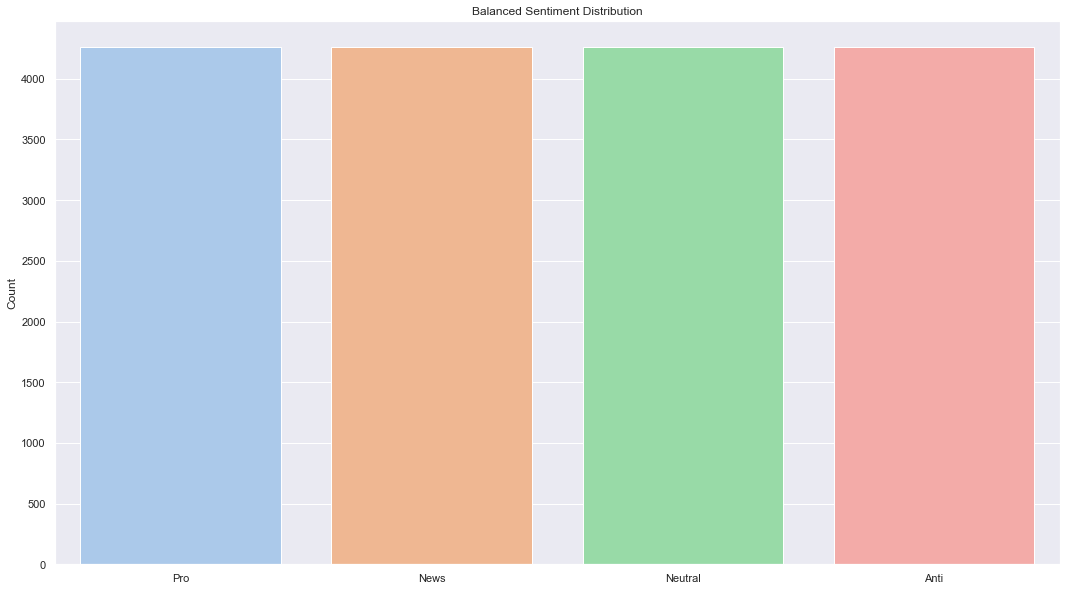

In [165]:
# Checking to see if our data has been equalized 
balanced_data = pd.DataFrame(list(res_df['sentiment'].value_counts()), index=['Pro', 'News', 'Neutral', 'Anti'],columns=['Count'])
sns.set()
f, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=balanced_data.index, y=balanced_data.Count, palette="pastel")
plt.title('Balanced Sentiment Distribution') 

In [166]:
# Defining the features as well as the label
X1 = res_df['message']
X_res_1 = X1.apply(Cleantweet)
X_res = X_res_1.apply(lemmatization) 
y_res = res_df['sentiment']

In [167]:
# Train test split on our balanced data set
X_train_htb, X_test_htb, y_train_htb, y_test_htb = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [168]:
# Creating a list of all the models to train
algs = [LogisticRegression(random_state = 5), SVC(kernel = 'linear', random_state = 5), SVC(kernel = 'rbf', random_state = 5)
        ,MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=6), RandomForestClassifier()]

In [187]:
# Fitting models onto the training data and predicting.
for i in range(0, len(algs)):
    text_clf = Pipeline([('count_vec', CountVectorizer(lowercase = True, ngram_range=(1, 2), analyzer='word')),
                         ('classifier', algs[i]),])
    text_clf.fit(X_train_htb, y_train_htb)  
    predictions_htb = text_clf.predict(X_test_htb)
    print(algs[i])
    print(metrics.confusion_matrix(y_test_htb,predictions_htb))
    print(metrics.classification_report(y_test_htb,predictions_htb))
    print('F1 Score: ',round(metrics.f1_score(y_test_htb,predictions_htb, average = 'weighted'),3))
    print('-------------------------------------------------------')

LogisticRegression(random_state=5)
[[1046   13   12    5]
 [  20  978   43   33]
 [  58  107  743  128]
 [   3   28   53  995]]
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      1076
           0       0.87      0.91      0.89      1074
           1       0.87      0.72      0.79      1036
           2       0.86      0.92      0.89      1079

    accuracy                           0.88      4265
   macro avg       0.88      0.88      0.88      4265
weighted avg       0.88      0.88      0.88      4265

F1 Score:  0.88
-------------------------------------------------------
SVC(kernel='linear', random_state=5)
[[1040   15   17    4]
 [  18  980   49   27]
 [  54  129  741  112]
 [   3   31   53  992]]
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      1076
           0       0.85      0.91      0.88      1074
           1       0.86      0.72      0.78      1036
           2      

In [170]:
# The overall accuracy score
print('Accuracy score:', metrics.accuracy_score(y_test_htb,predictions_htb))

Accuracy score: 0.8633059788980071


<a id="six"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we are going to analyse and evaluate the predictive capabilities of the best performing models by way of their precision, accuracy and F1 score. 

As displayed above, there exists several strategies on how to improve the performance of a model. We are able to clean our data through various techniques, alter the distribution and shape of our data, cross validate, and optimize our hyper-parameters through the use of various tuning techniques.    

In reality, our models performed much better on the imbalanced data set, more specifically, where we did not tamper with the number of observations across the different class labels. Data balancing strategies yielded little to no improvement in our model performance, and in actuality, our models were constantly suffering from overfitting. 

#### 7.1. Linear Support Vector Classifier


Linear SVC Model
 [[ 132   47   90    9]
 [  18  200  176   31]
 [  14   78 1527  136]
 [   6   16  137  547]]


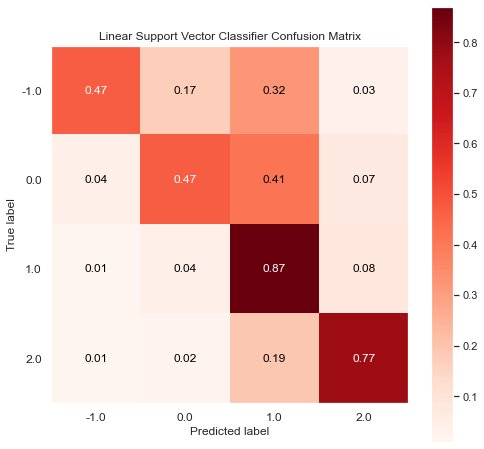

In [171]:
# Confusion Matrix of the Linear Support Vector Classifier
print('\nLinear SVC Model\n', confusion_matrix(y_test_ht, lsvc_prediction_ht))
plot_confusion_matrix(y_test_ht, lsvc_prediction_ht, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Linear Support Vector Classifier Confusion Matrix')
plt.show()

The above heatmap describes the recall score for each sentiment class.  

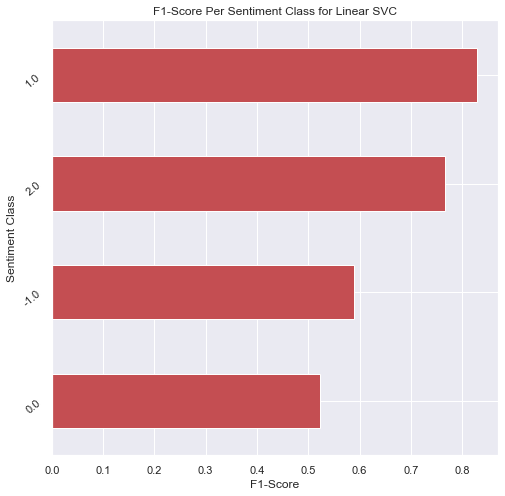

In [172]:
# F1 score per sentiment 
lsvc_graph = classification_report(y_test_ht, lsvc_prediction_ht, output_dict=True)
lsvc_graph_df = pd.DataFrame(lsvc_graph).transpose()
lsvc_graph_df.drop(['accuracy'], inplace = True)
lsvc_graph_df.sort_values(by=['f1-score'],ascending=True, inplace = True)
lsvc_graph_df.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color="r")
plt.xlabel('F1-Score')
plt.ylabel('Sentiment Class')
plt.yticks(rotation = 40)
plt.title('F1-Score Per Sentiment Class for Linear SVC')
plt.show()

- It should be highlighted that the Linear SVC model is able to classify the sentiment classes relatively well, more specifically, the "Pro" and "News" sentiment classes, with an F1 score of 0.81 and 0.75, respectively.  

- The Linear SVC model managed to receive an F1 score of about 0.50 on the "Anti" sentiment class.   

- In totality, the Linear SVC model performed relatively well on the data set. 

In [173]:
linearSVC_acc = round(accuracy_score(y_test_ht, lsvc_prediction_ht),4)
print(f'\nOverall accuracy score for the Linear SVC Model: {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_test_ht, lsvc_prediction_ht, average="weighted"),4)
print(f'\nWeighted average F1 score for the Linear SVC Model: {linearSVC_f1}')


Overall accuracy score for the Linear SVC Model: 0.7604

Weighted average F1 score for the Linear SVC Model: 0.7524


#### 7.2. Logistic Regression


Logistic Regression Model
 [[ 131   46   93    8]
 [  19  207  171   28]
 [  19   83 1532  121]
 [   5   14  140  547]]


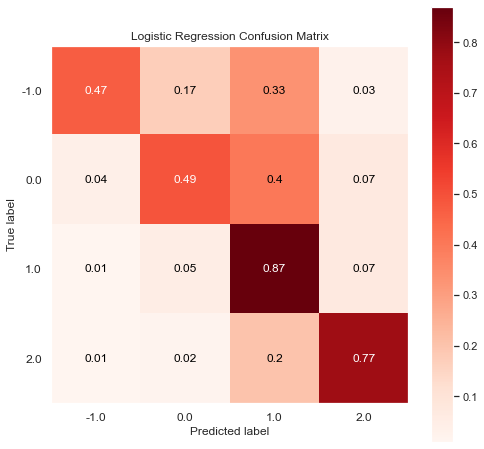

In [174]:
# Confusion Matrix of the Logistic Regression 
print('\nLogistic Regression Model\n', confusion_matrix(y_test_ht, logr_prediction_ht))
plot_confusion_matrix(y_test_ht, logr_prediction_ht, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

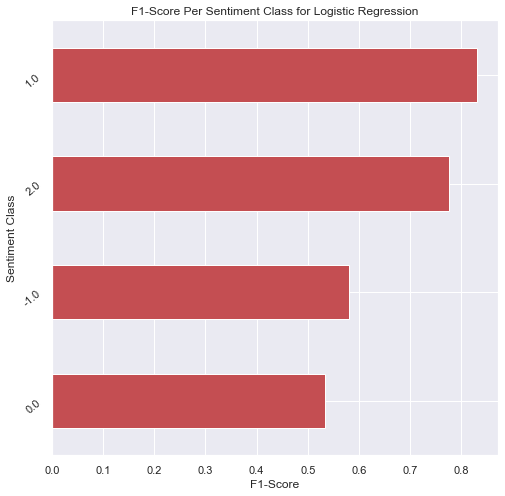

In [175]:
# F1 score per sentiment 
logreg_graph = classification_report(y_test_ht, logr_prediction_ht, output_dict=True)
logreg_graph_df = pd.DataFrame(logreg_graph).transpose()
logreg_graph_df.drop(['accuracy'], inplace = True)
logreg_graph_df.sort_values(by=['f1-score'],ascending=True, inplace = True)
logreg_graph_df.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color="r")
plt.xlabel('F1-Score')
plt.ylabel('Sentiment Class')
plt.yticks(rotation = 40)
plt.title('F1-Score Per Sentiment Class for Logistic Regression')
plt.show()

- The Logistic Regression model performed as well as the Linear SVC at classifying each sentiment class, specifically in regards to "Pro" and "News" sentiment classes.  

In [176]:
logistic_reg_acc = round(accuracy_score(y_test_ht, logr_prediction_ht),4)
print(f'\nOverall accuracy score for the Logistic Regression Model: {logistic_reg_acc}')
logistic_reg_acc_f1 = round(f1_score(y_test_ht, logr_prediction_ht, average="weighted"),4)
print(f'\nWeighted average F1 score for the Logistic Regression Model: {logistic_reg_acc_f1}')


Overall accuracy score for the Logistic Regression Model: 0.7639

Weighted average F1 score for the Logistic Regression Model: 0.7563


#### 7.3. Support Vector Classifier


Support Vector Classifier Model
 [[ 118   55   90   15]
 [  15  206  158   46]
 [  10  115 1424  206]
 [   3   22   94  587]]


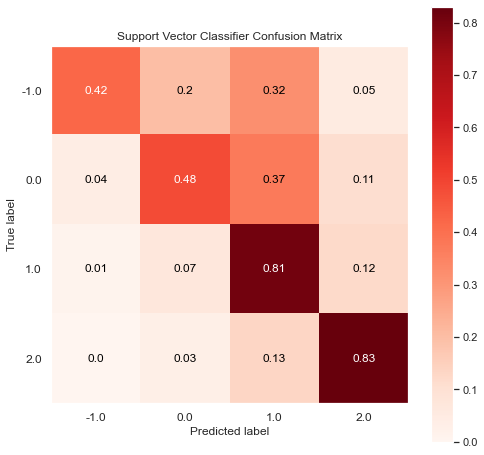

In [177]:
# Confusion Matrix of the Support Vector Classifier  
print('\nSupport Vector Classifier Model\n', confusion_matrix(y_test_ht, svc_prediction_ht))
plot_confusion_matrix(y_test_ht, svc_prediction_ht, normalize=True,figsize=(8,8),cmap='Reds')
plt.title('Support Vector Classifier Confusion Matrix')
plt.show()

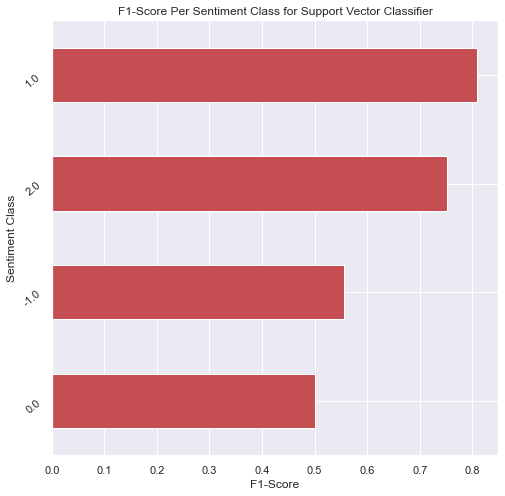

In [178]:
# F1 score per sentiment 
svc_graph = classification_report(y_test_ht, svc_prediction_ht, output_dict=True)
svc_graph_df = pd.DataFrame(svc_graph).transpose()
svc_graph_df.drop(['accuracy'], inplace = True)
svc_graph_df.sort_values(by = ['f1-score'],ascending=True, inplace = True)
svc_graph_df.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8), color="r")
plt.xlabel('F1-Score')
plt.ylabel('Sentiment Class')
plt.yticks(rotation = 40)
plt.title('F1-Score Per Sentiment Class for Support Vector Classifier')
plt.show()

- The Support Vector Classifier (SVC) performed extremely well on the "Pro" and the "News" sentiment classes, especially in comparison with the other above mentioned models. 

- The SVC performed the worst in regards to the "Anti" sentiment class.  

In [179]:
# Checking the accuracy score
svc_acc = round(accuracy_score(y_test_ht, svc_prediction_ht),4)
print(f'\nOverall accuracy score for the Support Vector Classifier Model: {svc_acc}')
svc_f1 = round(f1_score(y_test_ht, svc_prediction_ht, average="weighted"),4)
print(f'\nWeighted average F1 score for the Support Vector Classifier Model: {svc_f1}')


Overall accuracy score for the Support Vector Classifier Model: 0.738

Weighted average F1 score for the Support Vector Classifier Model: 0.7327


<a id="seven"></a>
## 8. Model Selection
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we shall discuss the best performing model, which is the tuned Logistic Regression Model. It has provided us with the best accuracy score, as well as the best weighted average F1 score out of all the models that we have built so far.  

The Logistic Regression Model achieved an F1 score of 0.84 for the "Pro" sentiment class, followed closely by the "News" and "Anti" sentiment classes, with a F1 score of 0.78 and 0.58, respectively. It should be noted that all the other models perfomed rather poorly when it came to classifying the "Anti" sentiment class.

In order to display the overall effectiveness of our selected model, we shall utilize a ROC Curve, as well the area under the curve (AUC). The ROC Curve is a probability curve and the AUC represents the degree or measure of separability. As such, it expresses how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at distinguishing between the positive and negative classes. 

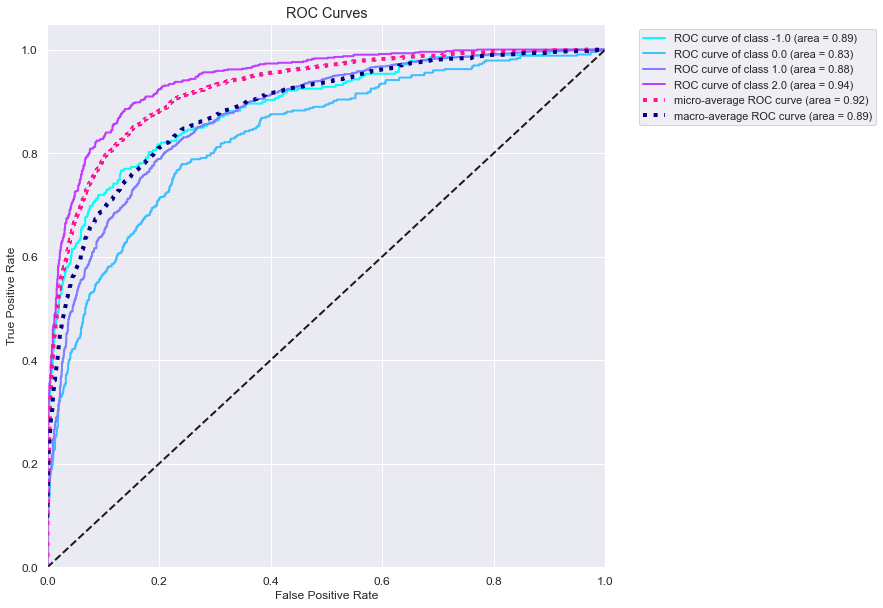

In [180]:
OneVsRest = OneVsRestClassifier(LogisticRegression(C = 7.9060432109076855, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
y_train_binarized = label_binarize(y_train_ht, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_test_ht, classes=[-1, 0, 1, 2])
OneVsRest.fit(X_train_ht, y_train_binarized)
y_prob = OneVsRest.decision_function(X_test_ht)
plot_roc(y_test_ht, y_prob,figsize=(10,10),cmap='cool')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<a id="seven"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In conclusion, our company has the technical expertise and knowledge to produce efficient models that are able to yield optimal results. On the topic of climate change, should we be appointed to serve as your company's data analytics company, we shall ensure  to help management make better decisions, identify opportunities, test the decisions already taken, and help your organization identify the target audience. 

As outlined above, we were able to clean the data that was provided to us, including but not limited to, formating same, removal of errors and/or duplicates and the removal of irrelevant information. Thereafter, and through the processes of data analysis and predictive modeling, we were able to understand the data and evaluate the performance and application of our models.

Together with our best performing models, more specifically, the Logistic Regression Model, we are able to uncover insightful information for various stakeholders whom are deeply invested in the issues surrounding climate change, as well as the public opinon thereof. 

<a id="seven"></a>
## 10. Test Data and Model Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [181]:
# Prediction on test data set 
# model_submission = logr_ht.predict(X_testing)   

In [182]:
# Appending the prediction results to the test set, in a new column called 'sentiment'
# result = pd.DataFrame(data = {'tweetid': test_df['tweetid'],
                               # 'sentiment': model_submission.astype('int')})

# Creating a csv file
# result.to_csv('test.csv', index = False, quoting = 3)

In [183]:
# result.tail(10)

,tweetid,sentiment
10536,288271,1
10537,961513,2
10538,46205,1
10539,27319,1
10540,634943,1
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0
10545,470892,1


In [184]:
# experiment.log_parameters(params)
# experiment.log_metrics(metrics) 

In [185]:
# close the experiment
# experiment.end()

In [186]:
# experiment.display()